# Capítulo 6 do curso de Python: fundamentos para análise de dados

In [1]:
## Este notebook tem finalidade puramente didática e por isso será documentoado de forma simples


In [2]:
### Esta será uma demonstração do uso de insert num banco de dados sqlite usando python
### Ela englobará adições estáticas e dinâmicas

In [3]:
import os
import random
import datetime
import time
import requests
import re
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
os.remove("dsa.db") if os.path.exists("dsa.db") else None



Import Sqlite3 and create functions to create the following itens:
+ A connection to the database
+ A cursor
+ A table in the database
+ An inserting method

In [5]:
import sqlite3

#This is a crud, a create-read-update-delete system

#connection:

conn = sqlite3.connect("dsa.db")

#Cursor
c = conn.cursor()

#table creation
def create_table():
    c.execute("CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT '\
              ', prod_name TEXT, valor TEXT )")
#data insertion
def data_insert(values):
    
    for value in values:
        print(value)
        c.execute("INSERT INTO produtos VALUES(?, '2020-17-01 17:17:17', ?, ?)", (value[0], value[1], value[2]))
        conn.commit()
        
#print all table
def print_all():
    c.execute("SELECT * FROM produtos")
    conn.commit()
    produtos = c.fetchall()
    for produto in produtos:
        print("produto id " + str(produto[0]) + " data " + produto[1] + " produto " + produto[2] + '\
              '" custando " + str(produto[3]))

#update register
def updater():
    c.execute("UPDATE  produtos SET valor = 10 WHERE id = 5")
    conn.commit()
    
#delete register
def deleter(num):
    c.execute("DELETE FROM produtos WHERE ID = " + str(num))

#data generator to populate the database
def data_generator(num):
    word_site = "https://www.mit.edu/~ecprice/wordlist.10000"
    response = requests.get(word_site)
    WORDS = response.content.decode('UTF-8')
    wordvec = WORDS.split("\n")

    generated = [[]]
    for i in range(0, 10):
        generated.append([i, wordvec[random.randrange(1, 10000)], random.randrange(50, 100)])
    return generated


def plotter():
    c.execute("SELECT id, valor FROM produtos")
    ids = []
    valores = []
    dados = c.fetchall()
    for linha in dados:
        print(linha)
        ids.append(linha[0])
        valores.append(linha[1])
    plt.bar(ids, valores)
    plt.show()
        

#close the database
def closer():
    c.close()
    conn.close()
    

### Create a table in the database 

In [6]:
create_table()

### Visualize the data that will populate the table

In [7]:
data_to_db = data_generator(10)
removed = data_to_db.pop(0)
print(data_to_db)

[[0, 'building', 83], [1, 'referral', 97], [2, 'grocery', 83], [3, 'win', 51], [4, 'protect', 61], [5, 'spatial', 62], [6, 'transparency', 82], [7, 'resulting', 51], [8, 'cos', 70], [9, 'bored', 81]]


### Populating the table

In [8]:
data_insert(data_to_db)

[0, 'building', 83]
[1, 'referral', 97]
[2, 'grocery', 83]
[3, 'win', 51]
[4, 'protect', 61]
[5, 'spatial', 62]
[6, 'transparency', 82]
[7, 'resulting', 51]
[8, 'cos', 70]
[9, 'bored', 81]


In [9]:
print_all()

produto id 0 data 2020-17-01 17:17:17 produto building               custando 83
produto id 1 data 2020-17-01 17:17:17 produto referral               custando 97
produto id 2 data 2020-17-01 17:17:17 produto grocery               custando 83
produto id 3 data 2020-17-01 17:17:17 produto win               custando 51
produto id 4 data 2020-17-01 17:17:17 produto protect               custando 61
produto id 5 data 2020-17-01 17:17:17 produto spatial               custando 62
produto id 6 data 2020-17-01 17:17:17 produto transparency               custando 82
produto id 7 data 2020-17-01 17:17:17 produto resulting               custando 51
produto id 8 data 2020-17-01 17:17:17 produto cos               custando 70
produto id 9 data 2020-17-01 17:17:17 produto bored               custando 81


(0, '83')
(1, '97')
(2, '83')
(3, '51')
(4, '61')
(5, '62')
(6, '82')
(7, '51')
(8, '70')
(9, '81')


<IPython.core.display.Javascript object>


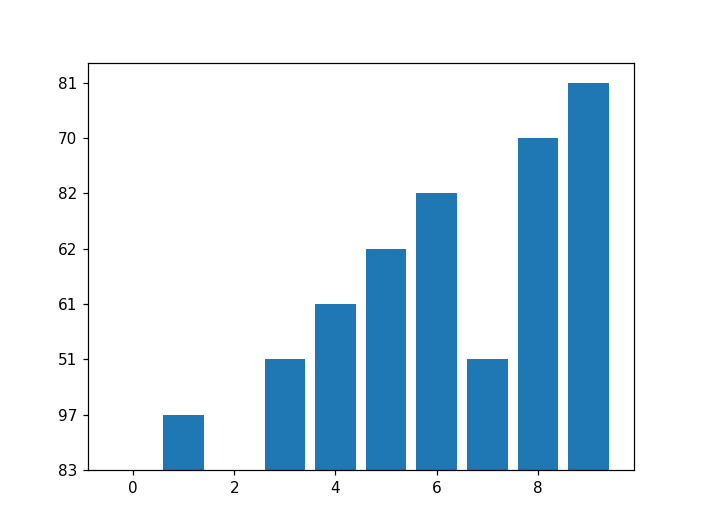

In [10]:
plotter()